# QUESTION 1 

# | What is an LDA? |
The first question requires the student to create a Fisher's style Linear Discriminant Analysis class, in the way that scikit learn usually does it (with a 'fit' and 'predict' function). A Linear Discriminant Analysis (LDA, for short) is commonly used in supervised learning (labels are provided), and is a dimensionality reduction technique. What this means is that it is used to project data in a higher dimension space to a lower dimension space, and to perform separation of two or more classes. Regarding the last statement, when analyzing an LDA graphic output, often times a line can be seen: said line is used to maximize the distance between the classes' means and to minimize the variation whithin each class.

# | What is Fisher's LDA? |
Fisher's LDA is a variation of the classic Linear Discriminant Analysis in that it is 'binary': only two labelled classes can be differentiated. In reality, Fisher's LDA was the first one to be invented, and the standard LDA was invented afterwards. The real difference between the two is found in the mathematical assumptions: Fisher's LDA has 7 assumptions that must be explored and understood to correctly model it. 
The list of assumptions will be attached to this document. 

# | Output interpretation |
One thousand points are created at random, and, like them, two different classes are created. Each class contains a calculated mean and covariance. The separation line is then created and, when looking at other Fisher discriminants (after a quick web search), it is observable that the line distanciates the two means correctly and, once again, correctly minimizes their variance inside their bounds. 

# | Final notes |
Dots were not chosen for the output. Instead, thicker squares allow the reader to focus more on the 'whole' of the class and visualize more where the mean is.



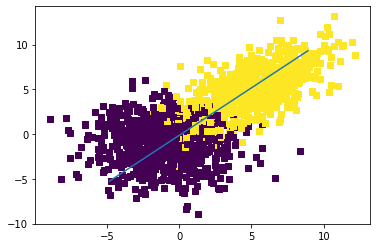

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#The subsequent class is used as the Fisher Linear Discriminant Analysis
#The BaseEstimator and ClassifierMixin will be used in the third exercise to compare each different classifier 
class LDA(BaseEstimator, ClassifierMixin): 
         
    def fit(self, X, Y):
        #uniqueY is the list of unique lables; the dimensions are subsequently found
        uniqueY = np.unique(Y)
        n = X.shape[0]
        self.d = X.shape[1]
        self.k = uniqueY.shape[0]
        self.prior = np.zeros([self.k, 1])
        self.mu = np.zeros([self.k, self.d])
        mu = np.mean(X, axis = 0)
        Xbar = X - mu
        self.Sig = (1/n) * Xbar.T @ Xbar
        self.invCov = np.linalg.inv(self.Sig)
        #D holds the class specific subsets
        D = []



        for i, y in enumerate(uniqueY):           
            Xi = X[Y == y]
            D.append(Xi)           
            ni = Xi.shape[0]
            
            self.prior[i] = ni / n
            
            self.mu[i] = np.mean(Xi, axis = 0)
        #B is the between class scatter matrix, and using it, the dominant eigenvectors
        #are computed. B is the product of the difference between the first and second of the class specific subset mean 
        # and the transpose of the same difference 
        #Z holds the center class matrices, which are the singular elements of D minus each transpose of the mean
        B  =((np.atleast_2d(self.mu[0] - self.mu[1]).T) @ np.atleast_2d(self.mu[0] - self.mu[1]))
        Z = []
        for i, di in enumerate(D):
            Z.append(di - self.mu[i])
        #S holds the between scatter matrices, which are the center class matrices multiplied by their transpose 
        S = []
        for Zi in Z:
            S.append(Zi.T @ Zi)
        #S total s the within class scatter matrix, which is the summation of the first and second element of S 
        STot = S[0] + S[1]


        self.w = np.linalg.inv(STot) @ np.atleast_2d(self.mu[0] - self.mu[1]).T
        self.w = self.w / np.linalg.norm(self.w)
        #The function returns the dominant eigenvector.
        return self.w



    def predict(self, X):
       mu = (self.mu[0] + self.mu[1]) / 2
       Y = []

       for x in X:
           d = np.atleast_2d(x - mu) @ self.w
           y = 0 if d>0 else 1
           Y.append(y)
        
       return Y
#1000 random points are selected and two different means are created, from two different arrays.
numberOfPoints = 1000
#Their covariance is also calculated, and the first dataset is created using this information. 
mean1 = np.array([-1, -1])
covariance1 = np.array([[6, 0], [0, 6]])
X1 = np.random.multivariate_normal(mean1, covariance1, numberOfPoints)
#The second dataset is created in the same way.
mean2 = np.array([5, 5])
covariance2 = np.array([[6, 4], [4, 6]])
X2 = np.random.multivariate_normal(mean2, covariance2, numberOfPoints)
#The total X is a single array made up of the vertical stacking of X1 and X2
#while Y is a horizontal array of the number of points times specific values.
X = np.vstack((X1, X2))
Y = np.hstack((numberOfPoints * [0], numberOfPoints * [1]))
#Values are trained and tested
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25, random_state = 1)
#The model is created and fitted to w
model = LDA()
w = model.fit(trainX, trainY)
#In addition, the mean is calculated, and with it, the differentiation line is plotted along with the chart.
mu = (np.mean(trainX[:,0]), np.mean(trainX[:,1]))
w = 10*w
x = [mu[0] - w[0], mu[0] + w[0]]
y = [mu[1] - w[1], mu[1] + w[1]]
predictedY = model.predict(testX)


plt.plot(x,y)
#The marker is usually '.', but I chosen ',' to make the singular points bigger and 
#render the difference clearer.
plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = ',')



# QUESTION 2
# | What is a DANN |
The second question had the students model another type of classifier: DANN. Dann stands for Discriminant Adaptive Nearest Neighbour and, as the name suggest, is very similar to the "K Nearest Neighbor" model. DANN is a very thorough classifier, however this characteristic, as we shall see later, also renders it very slow. DANN accepts more then two classes; in this case, three classes are used, and the third class is going to be generated in the same way as the previous two, in the previous exercise. A classification report is then printed, along with a classification matrix.

# | Output interpreation |
The classification report clearly shows that the first class (class 0) is the most accurate, and the other two follow in ascending order. If the classification report is not enough, this can also be viewed using the classification matrix, with a brighter color being in the 0-0 cell (meaning that more than 200 points of class 0 were accurately placed in class 0). In addition, through the matrix, it is clear that each class is accurate ENOUGH, as the diagonal is brightest, so more class points were accurate than not.

# | Final notes |
DANN is the classifier with the least amount of information, either in the class notes or on the Internet. The interpreter throws various warnings when computing DANN, but the program works and gives acceptable results.

C:\Users\marti\AppData\Local\Temp\ipykernel_22656\3993784934.py:64: RuntimeWarning: invalid value encountered in power
  wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5))) #enter formula picture from article


Classification report:                precision    recall  f1-score   support

           0       0.92      0.97      0.94       249
           1       0.60      0.53      0.57       252
           2       0.61      0.65      0.63       249

    accuracy                           0.72       750
   macro avg       0.71      0.72      0.71       750
weighted avg       0.71      0.72      0.71       750



<AxesSubplot:>

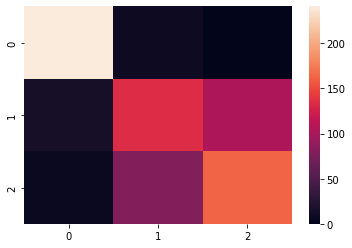

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import csv
from statistics import linear_regression
from sklearn.base import BaseEstimator, ClassifierMixin
import string
import matplotlib.pyplot as plt #Used primarily to draw plots
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LogisticRegression
from scipy import stats

#The subsequent class is used as the DANN classifier
#The BaseEstimator and ClassifierMixin will be used in the third exercise to compare each different classifier 


class DANN(BaseEstimator, ClassifierMixin):
     def __init__(self):
        self.data = None
        self.output = None
        self.KNN = None
        self.epsilon = 1
    
     def fit(self, data, output, KNN=50, epsilon=1):
        self.data = data
        self.output = output
        self.KNN = KNN
        self.epsilon = epsilon
        return self

     def predict(self, X, k=50):

        numberOfFeatures = X.shape[1]
        outputPreds = []

        for x in X:
            distance = []
            for element in self.data:
                distance.append(np.linalg.norm(x-element))
            nh = np.argsort(np.array(distance))[:self.KNN]
            nhMean = np.mean(self.data[nh])
            nh_labels = self.output[nh]

            nClasses = np.unique(nh_labels)
            insideCovar = np.zeros((numberOfFeatures, numberOfFeatures))
            betweenCovar = np.zeros((numberOfFeatures, numberOfFeatures))
            for cls in nClasses:
                clsWeight = (np.sum(nh_labels == cls)/self.KNN)
                clsCovar = np.cov(self.data[nh][nh_labels == cls], rowvar=False)
                insideCovar += clsCovar * clsWeight
                clsMean = np.mean(self.data[nh][nh_labels == cls])
                betweenCovar += np.outer(clsMean - nhMean, clsMean - nhMean) * clsWeight

           
            wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5))) 
            bSpecial = np.dot(wSpecial, betweenCovar.dot(wSpecial))

            I = np.identity(numberOfFeatures)
            sigma = wSpecial.dot(bSpecial + self.epsilon * I).dot(wSpecial)
            distances = []
            for element in self.data:
                differences = x - element
                distnc = differences.T.dot(sigma).dot(differences)
                distances.append(distnc)

            distances = np.array(distances) 
            closest = distances.argsort()[:self.KNN] #This function is used to sort by the K-nearest-neighbor which, in this case, is 50
            outputPred = stats.mode(self.output[closest]).mode[0] #finding mode of labels - most occuring number in labels -> outputPred
            #outputPreds represents the number that occurs the most in labels; outputPred is then the most occuring label because the points are being 
#changed to fit with the nearest neighbor with highest density.
            outputPreds.append(outputPred) #the chosen outputPred is appeneded to the list
        return outputPreds #The list of total choices is predicted

#1000 more points are created for this exercise
#Along with three different means, covariances and arrays.
numberOfPoints = 1000

mean1 = np.array([-1, -1])
covariance1 = np.array([[6, 0], [0, 6]])
X1 = np.random.multivariate_normal(mean1, covariance1, numberOfPoints)

mean2 = np.array([5, 5])
covariance2 = np.array([[6, 4], [4, 6]])
X2 = np.random.multivariate_normal(mean2, covariance2, numberOfPoints)

mean3 = np.array([6, 6])
covariance3 = np.array([[6,5], [5,6]])
X3 = np.random.multivariate_normal(mean3, covariance3, numberOfPoints)




#X is now formed with three arrays to make a vertical one
X = np.vstack((X1, X2, X3))

#And the vector of labels is once again made.
Y = np.hstack((numberOfPoints * [0], numberOfPoints * [1], numberOfPoints * [2]))

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25, random_state = 1)
plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = ',')
model = DANN()
#The model is fitted with w and the values are predicted.
w = model.fit(trainX, trainY)
predictedY = model.predict(testX)
mu = (np.mean(trainX[:,0]), np.mean(trainX[:,1]))
#The classification report is printed 
print('Classification report: ', classification_report(testY, predictedY))
#And the classification matrix is showed (will be explained further down)
sn.heatmap(confusion_matrix(testY, predictedY))




# QUESTION 3 
# | The comparisons |
The third exercise is, code line wise, the longest out of all the exercises. It allows the student to compare each cassifier method we used, both in accuracy and in execution time. The two worst time - wise classifiers (the two that took the most) will then be used in later exercises. Two text files are given, one for testing data, and one for training data; they both refer to sounds recordings relating to Parkinson's disease. The models that will be confronted and cross analyzed are: Bayes, Naive Bayes, LDA, QDA, DANN, Logistic Regression, Fisher and KNN. Most of them are available through Python libraries, while the rest have already been defined by the student.
# | Output interpretation - Who is the best and who is the worst? |
The best classifier, time wise, is found to be KNN (approximately 0.09 seconds); the worst is DANN (more than 10 seconds), followed by Bayes (approximately 3.95 seconds). Each classifier is cross analyzed, and, other than the time, the other printed values are the 'fit time', the 'score time' and the 'test accuracy'
# | Final notes | 
It was incredibly interesting to see the different performances of all of these different models. Logistic Regression and DANN throw warnings, but they still work.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sn
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import csv
import scipy 
from statistics import linear_regression
import string
import matplotlib.pyplot as plt #Used primarily to draw plots
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from scipy.stats import mode 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#DANN and Fisher classifier are written once more as they will be used later.


class DANN(BaseEstimator, ClassifierMixin):
     def __init__(self):
        self.data = None
        self.output = None
        self.KNN = None
        self.epsilon = 1
    
     def fit(self, data, output, KNN=50, epsilon=1):
        self.data = data
        self.output = output
        self.KNN = KNN
        self.epsilon = epsilon
        return self

     def predict(self, X, k=50):
        numberOfFeatures = X.shape[1]
        outputPreds = []
        for x in X:
            distance = []
            for element in self.data:
                distance.append(np.linalg.norm(x-element))
            nh = np.argsort(np.array(distance))[:self.KNN]
            nhMean = np.mean(self.data[nh])
            nh_labels = self.output[nh]

            nClasses = np.unique(nh_labels)
            insideCovar = np.zeros((numberOfFeatures, numberOfFeatures))
            betweenCovar = np.zeros((numberOfFeatures, numberOfFeatures))
            for cls in nClasses:
                clsWeight = (np.sum(nh_labels == cls)/self.KNN)
                clsCovar = np.cov(self.data[nh][nh_labels == cls], rowvar=False) 
                insideCovar += clsCovar * clsWeight
                clsMean = np.mean(self.data[nh][nh_labels == cls])
                betweenCovar += np.outer(clsMean - nhMean, clsMean - nhMean) * clsWeight
            wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5))) 
            bSpecial = np.dot(wSpecial, betweenCovar.dot(wSpecial))
            I = np.identity(numberOfFeatures)
            sigma = wSpecial.dot(bSpecial + self.epsilon * I).dot(wSpecial) 
            distances = []
            for element in self.data:
                differences = x - element
                distnc = differences.T.dot(sigma).dot(differences)
                distances.append(distnc)

            distances = np.array(distances) 
            closest = distances.argsort()[:self.KNN] 
            outputPred = stats.mode(self.output[closest]).mode[0] 
            outputPreds.append(outputPred) 
        return outputPreds 


class LDAFisher(BaseEstimator, ClassifierMixin):        
    def fit(self, X, Y):
        uniqueY = np.unique(Y)
        
        n = X.shape[0]
        self.d = X.shape[1]
        self.k = uniqueY.shape[0]
        
        self.prior = np.zeros([self.k, 1])
        self.mu = np.zeros([self.k, self.d])
        
        mu = np.mean(X, axis = 0)
        Xbar = X - mu
        self.Sig = (1/n) * Xbar.T @ Xbar
        self.invCov = np.linalg.inv(self.Sig)
        D = []

        for i, y in enumerate(uniqueY):           
            Xi = X[Y == y]
            D.append(Xi)           
            ni = Xi.shape[0]
            
            self.prior[i] = ni / n
            
            self.mu[i] = np.mean(Xi, axis = 0)

        B  =((np.atleast_2d(self.mu[0] - self.mu[1]).T) @ np.atleast_2d(self.mu[0] - self.mu[1]))
        Z = []
        for i, di in enumerate(D):
            Z.append(di - self.mu[i])
        
        S = []
        for Zi in Z:
            S.append(Zi.T @ Zi)
        
        STot = S[0] + S[1]


        self.w = np.linalg.inv(STot) @ np.atleast_2d(self.mu[0] - self.mu[1]).T
        self.w = self.w / np.linalg.norm(self.w)
        return self.w

    def predict(self, X):
       mu = (self.mu[0] + self.mu[1]) / 2
       Y = []

       for x in X:
           d = np.atleast_2d(x - mu) @ self.w
           y = 0 if d>0 else 1
           Y.append(y)
        
       return Y


#The BayesClassifier is taken from a previous assignment and the BaseEstimator and ClassifierMixin
#is integrated in the class 
class BayesClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, Y):
        #uniqueY is the list of unique lables; the dimensions are subsequently found
        uniqueY = np.unique(Y)
        n = X.shape[0]
        self.d = X.shape[1]
        self.k = uniqueY.shape[0]
        self.prior = np.zeros([self.k, 1])
        self.mu = np.zeros([self.k, self.d])
        self.Sigma = np.zeros([self.k, self.d, self.d])

        #Sample means and covatiances are calculated
        for i, y in enumerate(uniqueY):
            #X is separated into its different classes, and the size of each class is found.
            Xi = X[Y == y]
            ni = Xi.shape[0]
            #Priors are also found, along with the sample mean being calculated
            self.prior[i] = ni / n
            self.mu[i] = np.mean(Xi, axis=0)
            #The centered data and centered covariance are also calculated
            XiBar = Xi - self.mu[i]
            self.Sigma[i] = (1 / ni) * XiBar.T @ XiBar

    def predict(self, X):
        n = X.shape[0]
        posteriorPre = np.zeros([n, self.k])
        #Posterior probabilitie's pdf is calculated 
        for i in range(n):
            for j in range(self.k):
                posteriorPre[i][j] = scipy.stats.multivariate_normal.pdf(X[i], self.mu[j], self.Sigma[j],
                                                                         allow_singular=True)
        #Along with a vector that is proportional to them
        posterior = posteriorPre * self.prior.T
        #By choosing the most probable class, the label for each datapoint is found.
        predictions = np.argmax(posterior, axis=1)
        #Such predictions are then returned
        return predictions


#The two different documents are read in as text files, and the names of the columns are subsequently added
df  = pd.read_csv('C:\\Users\\marti\\OneDrive\\Desktop\\Homework III\\Parkinson_Multiple_Sound_Recording\\train_data.txt')
dfTest = pd.read_csv('C:\\Users\\marti\\OneDrive\\Desktop\\Homework III\\Parkinson_Multiple_Sound_Recording//test_data.txt')


df.columns = ['Subject', 'Jitter(local)', 'Jitter(local, absolute)', 'Jitter(rap)', 'Jitter(ppq5)', 'Jitter(ddp)', 'Shimmer(local)', 'Shimmer(local, dB)', 'Shimmer(apq3)', 'Shimmer(apq5)', 'Shimmer(apq11)', 'Shimmer(dda)', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'UPDRS', 'class']
df.head()

dfTest.columns = ['Subject', 'Jitter(local)', 'Jitter(local, absolute)', 'Jitter(rap)', 'Jitter(ppq5)', 'Jitter(ddp)', 'Shimmer(local)', 'Shimmer(local, dB)', 'Shimmer(apq3)', 'Shimmer(apq5)', 'Shimmer(apq11)', 'Shimmer(dda)', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'class']
dfTest.head()
#dfX is comprised of all the columns but 'class' and 'UPDRS'
dfX  = df.drop(columns = ['class', 'UPDRS'])
#dfY is just 'class'
dfY = df['class']
#Both arrays are then converted to numpy
dfX = dfX.to_numpy()
dfY = dfY.to_numpy()
#The same is done for the testing set 
dfTestX = dfTest.drop(columns = ['class'])
dfTestY = dfTest['class']

dfTestX = dfTestX.to_numpy()
dfTestY = dfTestY.to_numpy()

#The following procedure is executed for each classifier:
#1. A start time is begun, it will take the time from that instance to when the class will be called again
#2. A model is created
#3. The model will be cross validated (this is where BayesEstimator and ClassMixin are needed) with the central focus to its accuracy
#4. The model is fitted 
#5 The time class is called once again and the ending times is taken
#6. Both the cross validation result and the time it took for it to run (which is the ending time minus the starting time) are outputted

#The order is:
#1. Bayes
#2. LDA (python library)
#3. QDA (python library)
#4. Fisher
#5. Naive Bayes (python library)
#6. KNN (python library)
#7. Logistic Regression (python library)
#8. DANN

startBayes = time.time()
model = BayesClassifier()
result = cross_validate(BayesClassifier(), dfX, dfY, cv = 5, scoring = ['accuracy'])
model.fit(dfX, dfY)
predictedOutput = model.predict(dfTestX)
runTimeBayes = time.time()
print ("Bayes:", result)
print("Time it took:", runTimeBayes - startBayes)
print('Classification report: ', classification_report(dfTestY, predictedOutput))



startLDA = time.time()
model = LinearDiscriminantAnalysis()
result = cross_validate(LinearDiscriminantAnalysis(), dfX, dfY, cv = 5, scoring = ['accuracy'])
model.fit(dfX, dfY)
predictedOutput = model.predict(dfTestX)
runTimeLDA = time.time()
print("LDA:", result)
print("Time it took:", runTimeLDA - startLDA)
print('Classification report: ', classification_report(dfTestY, predictedOutput))


startQDA = time.time()
model = QuadraticDiscriminantAnalysis()
result = cross_validate(QuadraticDiscriminantAnalysis(), dfX, dfY, cv = 5, scoring = ['accuracy'])
model.fit(dfX, dfY)
predictedOutput = model.predict(dfTestX)
runTimeQuadratic = time.time()
print("Quadratic:", result)
print("Time it took:", runTimeQuadratic - startQDA)
print('Classification report: ', classification_report(dfTestY, predictedOutput))


startFisher = time.time()
model = LDAFisher()
result = cross_validate(LDAFisher(), dfX, dfY, cv = 5, scoring = ['accuracy'])
model.fit(dfX, dfY)
predictedOutput = model.predict(dfTestX)
runTimeFisher = time.time()
print("Fisher:", result)
print("Time it took:", runTimeFisher - startFisher)
print('Classification report: ', classification_report(dfTestY, predictedOutput))


startNaiveBayes = time.time()
model = GaussianNB()
result = cross_validate(GaussianNB(), dfX, dfY, cv = 5, scoring = ['accuracy'])
model.fit(dfX, dfY)
predictedOutput = model.predict(dfTestX)
runTimeNBayes = time.time()
print("Naive Bayes:", result)
print("Time it toook:", runTimeNBayes - startNaiveBayes)
print('Classification report: ', classification_report(dfTestY, predictedOutput))


startKNN = time.time()
model = KNeighborsClassifier()
result = cross_validate(KNeighborsClassifier(), dfX, dfY, cv = 5, scoring = ['accuracy'])
model.fit(dfX, dfY)
predictedOutput = model.predict(dfTestX)
runTimeKNN = time.time()
print("KNN:", result)
print("Time it took:", runTimeKNN - startKNN)
print('Classification report: ', classification_report(dfTestY, predictedOutput))


startLogReg = time.time()
model = LogisticRegression()
result = cross_validate(LogisticRegression(), dfX, dfY, cv = 5, scoring = ['accuracy'])
model.fit(dfX, dfY)
predictedOutput = model.predict(dfTestX)
runTimeLogReg = time.time()
print("Logistic Regression:", result)
print("Time it took:", runTimeLogReg - startLogReg)
print('Classification report: ', classification_report(dfTestY, predictedOutput))



startDANN = time.time()
model = DANN()
result = cross_validate(DANN(), dfX, dfY, cv = 5, scoring = ['accuracy'])
model.fit(dfX, dfY)
predictedOutput = model.predict(dfTestX)
runTimeDANN = time.time()
print("DANN:", result)
print("Time it took:", runTimeDANN - startDANN)
print('Classification report: ', classification_report(dfTestY, predictedOutput))


Bayes: {'fit_time': array([0.00189781, 0.00173712, 0.00215244, 0.00099707, 0.00147295]), 'score_time': array([0.55324602, 0.58075976, 0.63531184, 0.71786499, 0.70080113]), 'test_accuracy': array([0.625     , 0.82211538, 0.92788462, 0.95192308, 0.84541063])}
Time it took: 3.768326997756958
Classification report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89       167

    accuracy                           0.80       167
   macro avg       0.50      0.40      0.44       167
weighted avg       1.00      0.80      0.89       167

LDA: {'fit_time': array([0.01074934, 0.01057911, 0.01205325, 0.01058054, 0.01024175]), 'score_time': array([0.00099778, 0.        , 0.        , 0.        , 0.00099826]), 'test_accuracy': array([0.86057692, 0.95673077, 0.96634615, 0.98076923, 0.79227053])}
Time it took: 0.07428169250488281
Classification report:                precision    recall  f1-score  

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetri

Classification report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.65      0.79       167

    accuracy                           0.65       167
   macro avg       0.50      0.33      0.39       167
weighted avg       1.00      0.65      0.79       167

Naive Bayes: {'fit_time': array([0.        , 0.00332499, 0.0016191 , 0.00099683, 0.00103521]), 'score_time': array([0.        , 0.0010004 , 0.00037336, 0.0009985 , 0.        ]), 'test_accuracy': array([0.55769231, 0.91826923, 0.91826923, 0.97115385, 0.79710145])}
Time it toook: 0.011379241943359375
Classification report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67       167

    accuracy                           0.50       167
   macro avg       0.50      0.25      0.33       167
weighted avg       1.00      0.50      0.67       167

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Logistic Regression: {'fit_time': array([0.08654046, 0.09300208, 0.08099008, 0.08517742, 0.08495688]), 'score_time': array([0.00096536, 0.00099707, 0.00103641, 0.0009973 , 0.00105405]), 'test_accuracy': array([0.92788462, 0.97115385, 0.95673077, 0.96634615, 0.84057971])}
Time it took: 0.5289137363433838
Classification report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86       167

    accuracy                           0.75       167
   macro avg       0.50      0.38      0.43       167
weighted avg       1.00      0.75      0.86       167



C:\Users\marti\AppData\Local\Temp\ipykernel_14256\4181274895.py:74: RuntimeWarning: invalid value encountered in power
  wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5)))
C:\Users\marti\AppData\Local\Temp\ipykernel_14256\4181274895.py:74: RuntimeWarning: invalid value encountered in power
  wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5)))
C:\Users\marti\AppData\Local\Temp\ipykernel_14256\4181274895.py:74: RuntimeWarning: invalid value encountered in power
  wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5)))
C:\Users\marti\AppData\Local\Temp\ipykernel_14256\4181274895.py:74: RuntimeWarning: invalid value encountered in power
  wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5)))
C:\Users\marti\AppData\Local\Temp\ipykernel_14256\4181274895.py:74: RuntimeWarning: invalid value encountered in power
  wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_

DANN: {'fit_time': array([0.        , 0.        , 0.        , 0.        , 0.00099993]), 'score_time': array([2.06314397, 2.02542877, 1.89095259, 2.51235223, 2.14920759]), 'test_accuracy': array([0.5       , 0.58173077, 0.46634615, 0.52403846, 0.48309179])}
Time it took: 12.84276008605957
Classification report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.16      0.27       167

    accuracy                           0.16       167
   macro avg       0.50      0.08      0.13       167
weighted avg       1.00      0.16      0.27       167



C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetri

# QUESTION 4
# | What is PCA? |
PCA is a technique that helps with reducing the testing and training data; many times most of the data is reduntant, so reducing it in a specific way does not make much of a difference. In this example, the two worst classifier, from the previous exercise, are chosen (Bayes and DANN), and their performance is observed after using PCA on their data. PCA stands for Principal Component Analysis.
# | Output interpretation |
Maybe it did not make too much of a difference, but both Bayes' and DANN's execution time has decreased, which is a positive result.
# | Final notes |
As in the previous exercise, DANN produces warnings, but works.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sn
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import csv
import scipy 
from statistics import linear_regression
import string
import matplotlib.pyplot as plt #Used primarily to draw plots
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from scipy.stats import mode 
import warnings

class DANN(BaseEstimator, ClassifierMixin):
     def __init__(self):
        self.data = None
        self.output = None
        self.KNN = None
        self.epsilon = 1
    
     def fit(self, data, output, KNN=50, epsilon=1):
        self.data = data
        self.output = output
        self.KNN = KNN
        self.epsilon = epsilon
        return self

     def predict(self, X, k=50):
        numberOfFeatures = X.shape[1]
        outputPreds = []
        for x in X:
            distance = []
            for element in self.data:
                distance.append(np.linalg.norm(x-element))
            nh = np.argsort(np.array(distance))[:self.KNN]
            nhMean = np.mean(self.data[nh])
            nh_labels = self.output[nh]

            nClasses = np.unique(nh_labels)
            insideCovar = np.zeros((numberOfFeatures, numberOfFeatures))
            betweenCovar = np.zeros((numberOfFeatures, numberOfFeatures))
            for cls in nClasses:
                clsWeight = (np.sum(nh_labels == cls)/self.KNN)
                clsCovar = np.cov(self.data[nh][nh_labels == cls], rowvar=False) 
                insideCovar += clsCovar * clsWeight
                clsMean = np.mean(self.data[nh][nh_labels == cls])
                betweenCovar += np.outer(clsMean - nhMean, clsMean - nhMean) * clsWeight
            wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5))) 
            bSpecial = np.dot(wSpecial, betweenCovar.dot(wSpecial))
            I = np.identity(numberOfFeatures)
            sigma = wSpecial.dot(bSpecial + self.epsilon * I).dot(wSpecial) 
            distances = []
            for element in self.data:
                differences = x - element
                distnc = differences.T.dot(sigma).dot(differences)
                distances.append(distnc)

            distances = np.array(distances) 
            closest = distances.argsort()[:self.KNN] 
            outputPred = stats.mode(self.output[closest]).mode[0] 
            outputPreds.append(outputPred) 
        return outputPreds 


#The BayesClassifier is taken from a previous assignment and the BaseEstimator and ClassifierMixin
#is integrated in the class 
class BayesClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, Y):
        #uniqueY is the list of unique lables; the dimensions are subsequently found
        uniqueY = np.unique(Y)
        n = X.shape[0]
        self.d = X.shape[1]
        self.k = uniqueY.shape[0]
        self.prior = np.zeros([self.k, 1])
        self.mu = np.zeros([self.k, self.d])
        self.Sigma = np.zeros([self.k, self.d, self.d])

        #Sample means and covatiances are calculated
        for i, y in enumerate(uniqueY):
            #X is separated into its different classes, and the size of each class is found.
            Xi = X[Y == y]
            ni = Xi.shape[0]
            #Priors are also found, along with the sample mean being calculated
            self.prior[i] = ni / n
            self.mu[i] = np.mean(Xi, axis=0)
            #The centered data and centered covariance are also calculated
            XiBar = Xi - self.mu[i]
            self.Sigma[i] = (1 / ni) * XiBar.T @ XiBar

    def predict(self, X):
        n = X.shape[0]
        posteriorPre = np.zeros([n, self.k])
        #Posterior probabilitie's pdf is calculated 
        for i in range(n):
            for j in range(self.k):
                posteriorPre[i][j] = scipy.stats.multivariate_normal.pdf(X[i], self.mu[j], self.Sigma[j],
                                                                         allow_singular=True)
        #Along with a vector that is proportional to them
        posterior = posteriorPre * self.prior.T
        #By choosing the most probable class, the label for each datapoint is found.
        predictions = np.argmax(posterior, axis=1)
        #Such predictions are then returned
        return predictions



df  = pd.read_csv('C:\\Users\\marti\\OneDrive\\Desktop\\Homework III\\Parkinson_Multiple_Sound_Recording\\train_data.txt')
dfTest = pd.read_csv('C:\\Users\\marti\\OneDrive\\Desktop\\Homework III\\Parkinson_Multiple_Sound_Recording//test_data.txt')


df.columns = ['Subject', 'Jitter(local)', 'Jitter(local, absolute)', 'Jitter(rap)', 'Jitter(ppq5)', 'Jitter(ddp)', 'Shimmer(local)', 'Shimmer(local, dB)', 'Shimmer(apq3)', 'Shimmer(apq5)', 'Shimmer(apq11)', 'Shimmer(dda)', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'UPDRS', 'class']
df.head()

dfTest.columns = ['Subject', 'Jitter(local)', 'Jitter(local, absolute)', 'Jitter(rap)', 'Jitter(ppq5)', 'Jitter(ddp)', 'Shimmer(local)', 'Shimmer(local, dB)', 'Shimmer(apq3)', 'Shimmer(apq5)', 'Shimmer(apq11)', 'Shimmer(dda)', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'class']
dfTest.head()
#dfX is comprised of all the columns but 'class' and 'UPDRS'
dfX  = df.drop(columns = ['class', 'UPDRS'])
#dfY is just 'class'
dfY = df['class']
#Both arrays are then converted to numpy
dfX = dfX.to_numpy()
dfY = dfY.to_numpy()

dfTestX = dfTest.drop(columns = ['class'])
dfTestY = dfTest['class']

dfTestX = dfTestX.to_numpy()
dfTestY = dfTestY.to_numpy()
#the PCA is set to reduce by 90%. Both the training and testing data are transformed through PCA 
pca = PCA(0.9)
xPca = pca.fit_transform(dfX)
testXPca = pca.transform(dfTestX)

#As in the previous exercise, the same process occurs, only this time with the pca adjusted data
startBayes = time.time()
model = BayesClassifier()
result = cross_validate(BayesClassifier(), xPca, dfY, cv = 5, scoring = ['accuracy'])
model.fit(xPca, dfY)
predictedOutput = model.predict(testXPca)
runTimeBayes = time.time()
print ("Bayes:", result)
print("Time it took:", runTimeBayes - startBayes)


startDANN = time.time()
model = DANN()
result = cross_validate(DANN(), xPca, dfY, cv = 5, scoring = ['accuracy'])
model.fit(xPca, dfY)
predictedOutput = model.predict(testXPca)
runTimeDANN = time.time()
print("DANN:", result)
print("Time it took:", runTimeDANN - startDANN)






Bayes: {'fit_time': array([0.00099802, 0.        , 0.        , 0.00099754, 0.0009954 ]), 'score_time': array([0.0349412 , 0.04103327, 0.03370166, 0.03294659, 0.03287911]), 'test_accuracy': array([0.36057692, 0.47115385, 0.5       , 0.54807692, 0.43961353])}
Time it took: 0.20641875267028809


C:\Users\marti\AppData\Local\Temp\ipykernel_7340\2614394169.py:70: RuntimeWarning: invalid value encountered in power
  wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5)))
C:\Users\marti\AppData\Local\Temp\ipykernel_7340\2614394169.py:70: RuntimeWarning: invalid value encountered in power
  wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5)))
C:\Users\marti\AppData\Local\Temp\ipykernel_7340\2614394169.py:70: RuntimeWarning: invalid value encountered in power
  wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5)))
C:\Users\marti\AppData\Local\Temp\ipykernel_7340\2614394169.py:70: RuntimeWarning: invalid value encountered in power
  wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(insideCovar), 0.5)))
C:\Users\marti\AppData\Local\Temp\ipykernel_7340\2614394169.py:70: RuntimeWarning: invalid value encountered in power
  wSpecial = np.linalg.pinv(np.nan_to_num(np.power(np.nan_to_num(i

DANN: {'fit_time': array([0.00099683, 0.        , 0.        , 0.00099778, 0.        ]), 'score_time': array([1.27981091, 1.34790778, 1.31876445, 1.36355996, 1.29170275]), 'test_accuracy': array([0.45192308, 0.55769231, 0.59615385, 0.47115385, 0.46859903])}
Time it took: 7.80790638923645


# QUESTION 5 
# | What is Logistic Regression with the LASSO feature? |
Logistic Regression is a tool used in machine learning for supervised learning, and used to calculate or predict the probability of a binary event (yes/no, for example). It can also be thought of as a statistical analysis method that predicts binary outcomes, based on an observation of the data conducted previously. LASSO, on the other hand, is a regression analysis method which both regulizes and variable selects the data, in order to make it more accurate and interpretable. In this exercise, Logistic Regression WITH the LASSO feature is used to determine which features are important and which are unimportant. 
# | Output interpretation |
From the graph, it is obvious that the most important features are 'jitter(ddp)' and 'NTH'(almost 0.5), while features like 'Subject' seem to not matter much. Many other featurs are around the same value. 'Subject' is just the numerical value assigned to each patient, however, it is akin to name or a nickname: there is no reason to believe that somebody would get Parkinson if their name was Jerry or Hannah. 'Shimmer (apq5)' is another feature that does not seem important. When these features are taken out, the results are clear: they make a small but significant difference.
# | Final notes |
The absence of 'Subject' makes a notable difference.

THE COEFFICIENT: [-1.70411027  0.029634    0.          0.          0.          0.
  0.43484049  0.          0.         -0.21674433  0.0892014   0.03793955
  0.          0.          0.52457767  0.02940604  0.06063679 -0.03265349
 -0.03558879 -0.00606461 -0.04710146  0.04625271  0.          0.
  0.06095844  0.         -0.0051538 ]


C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Logistic Regression: {'fit_time': array([0.08855271, 0.08443141, 0.09768558, 0.10041761, 0.09464574]), 'score_time': array([0.        , 0.        , 0.00051284, 0.        , 0.00101185]), 'test_accuracy': array([0.92788462, 0.97115385, 0.95673077, 0.96634615, 0.84057971])}
Time it took: 0.4702491760253906
Classification report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.72      0.84       167

    accuracy                           0.72       167
   macro avg       0.50      0.36      0.42       167
weighted avg       1.00      0.72      0.84       167



C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Logistic Regression: {'fit_time': array([0.10308123, 0.10364127, 0.09822655, 0.10429144, 0.09022403]), 'score_time': array([0.00099754, 0.00095081, 0.        , 0.        , 0.        ]), 'test_accuracy': array([0.92788462, 0.97115385, 0.95673077, 0.96634615, 0.84057971])}
Time it took: 0.505439281463623
Classification report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.72      0.84       167

    accuracy                           0.72       167
   macro avg       0.50      0.36      0.42       167
weighted avg       1.00      0.72      0.84       167



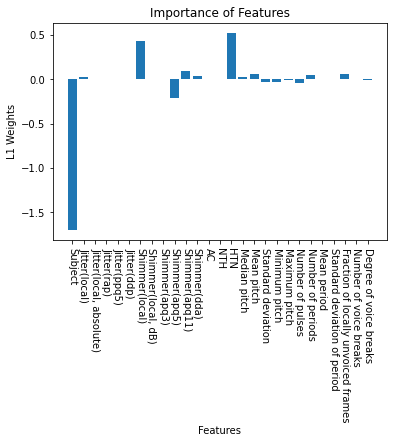

<Figure size 432x288 with 0 Axes>

In [9]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df  = pd.read_csv('C:\\Users\\marti\\OneDrive\\Desktop\\Homework III\\Parkinson_Multiple_Sound_Recording\\train_data.txt')
dfTest = pd.read_csv('C:\\Users\\marti\\OneDrive\\Desktop\\Homework III\\Parkinson_Multiple_Sound_Recording//test_data.txt')


df.columns = ['Subject', 'Jitter(local)', 'Jitter(local, absolute)', 'Jitter(rap)', 'Jitter(ppq5)', 'Jitter(ddp)', 'Shimmer(local)', 'Shimmer(local, dB)', 'Shimmer(apq3)', 'Shimmer(apq5)', 'Shimmer(apq11)', 'Shimmer(dda)', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'UPDRS', 'class']
df.head()

dfTest.columns = ['Subject', 'Jitter(local)', 'Jitter(local, absolute)', 'Jitter(rap)', 'Jitter(ppq5)', 'Jitter(ddp)', 'Shimmer(local)', 'Shimmer(local, dB)', 'Shimmer(apq3)', 'Shimmer(apq5)', 'Shimmer(apq11)', 'Shimmer(dda)', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'class']
dfTest.head()
#dfX is comprised of all the columns but 'class' and 'UPDRS'
dfX  = df.drop(columns = ['class', 'UPDRS'])
#dfY is just 'class'
dfY = df['class']
#Both arrays are then converted to numpy
dfX = dfX.to_numpy()
dfY = dfY.to_numpy()
#The logistic regression class is invoked and uses an l1 (LASSO) regularization, in case it overfits the data. 
logisticReg = LogisticRegression(penalty = "l1", solver = "liblinear", C = 1.0 )
#The data is fitted
logisticReg.fit(dfX, dfY)
print("THE COEFFICIENT:", logisticReg.coef_[0])
#The plot is created, with a white background, red edge color, blue bars and black lines.
plt.figure( facecolor='white', edgecolor='red')

plt.bar( range( len(logisticReg.coef_[0])) , logisticReg.coef_[0] )
plt.xticks(range(len(logisticReg.coef_[0])), df.columns[:-2], rotation=270 )

plt.ylabel('L1 Weights')
plt.xlabel('Features')
plt.title('Importance of Features')

startLogReg = time.time()
result = cross_validate(LogisticRegression(), dfX, dfY, cv = 5, scoring = ['accuracy'])
predictedOutput = logisticReg.predict(dfTestX)
runTimeLogReg = time.time()
print("Logistic Regression:", result)
print("Time it took:", runTimeLogReg - startLogReg)
print('Classification report: ', classification_report(dfTestY, predictedOutput))

np.delete(dfX, 0 , axis = None)
np.delete(dfX, 9, axis = None)
logisticReg.fit(dfX, dfY)
plt.figure( facecolor='white', edgecolor='red')

startLogReg = time.time()
result = cross_validate(LogisticRegression(), dfX, dfY, cv = 5, scoring = ['accuracy'])
predictedOutput = logisticReg.predict(dfTestX)
runTimeLogReg = time.time()
print("Logistic Regression:", result)
print("Time it took:", runTimeLogReg - startLogReg)
print('Classification report: ', classification_report(dfTestY, predictedOutput))

# FINAL CONSIDERATIONS

Out of all the homework (including the Python test), this has been the most interesting and eye opening. I believe to have learned quite a lot from this particular assignment, and feel confident when tackling the argument of classifiers. 